In [25]:
import numpy as np 
import matplotlib.pyplot as plt

#import stats
from scipy import stats

import random as rnd
import matplotlib.colors as colors


In [26]:
# #import Vele data
# #it has 2 colums with data N and South
# data = np.loadtxt('../Vela_Data/ch00_B0833-45_20150612_191438_011_1', skiprows=1, delimiter=' ')

# # convert it into two arrays Noth and South
# N_data = data[:,0]
# S_data = data[:,1]



In [ ]:
def read_full(file):
    # Read binary file as 32-bit integers and reshape to 2 columns (North, South)
    temp_data = np.fromfile(file, dtype=np.int32).reshape(-1, 2)
    # Remove any rows with NaN values (if any)
    clean_data = temp_data[~np.isnan(temp_data).any(axis=1)]
    north = temp_data[:, 0]
    south = temp_data[:, 1]
    return north, south



file = "/home/ashwin-ubuntu/Documents/Vela_Data-20250313T050631Z-001/Vela_Data/Binary_MBR/ch00_B0833-45_snip_20150612_191438_011.mbr"
N_data, S_data = read_full(file)



In [41]:
# N_data = data[:,0]
print(N_data)

# S_data = data[:,1]
print(S_data)

# print(len(N_data))
# print(len(S_data))

# print(f"Time = {len(N_data)/33}")
# print(f"Time = {len(S_data)/33}")

[1146241613          0          0 ...  172235760  367969290 -316677909]
[ 825249875          0          0 ... -654768851  165617977 -416531769]


North Signal mean =  18096111.13718
North Signal std =  522725279.4257162


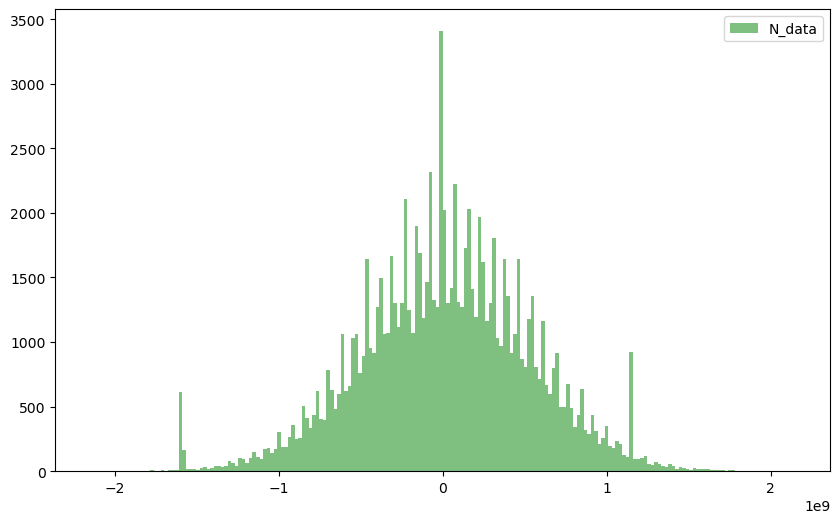

South Signal mean =  25526681.5955
South Signal std =  511464405.88123935


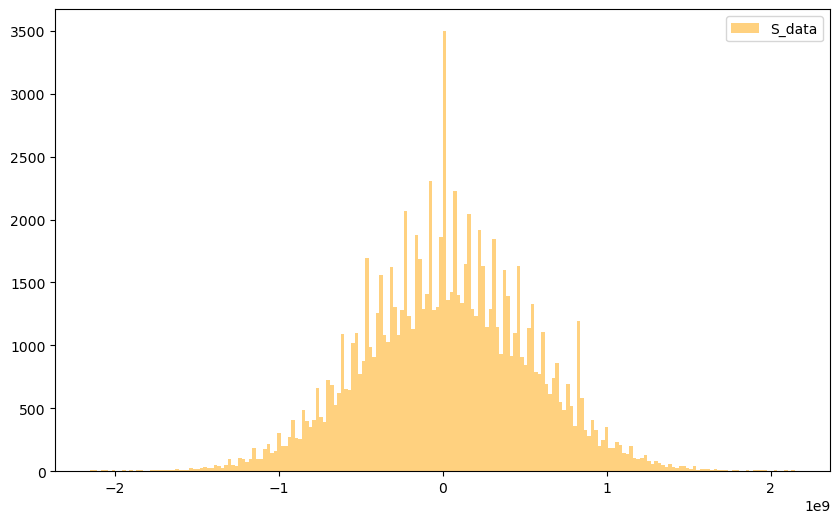

In [29]:
#Randomely selecting a part of data
N_Sample = rnd.sample(list(N_data), 100000)
S_Sample = rnd.sample(list(S_data), 100000)

#ploting histogram of data

print("North Signal mean = ", np.mean(N_Sample))
print("North Signal std = ", np.std(N_Sample))

plt.figure(figsize=(10, 6))
plt.hist(N_Sample, bins=200, alpha=0.5, color = 'green',label='N_data')
plt.legend(loc='upper right')
plt.show()

print("South Signal mean = ", np.mean(S_Sample))
print("South Signal std = ", np.std(S_Sample))

plt.figure(figsize=(10, 6))
plt.hist(S_Sample, bins=200, alpha=0.5, color = 'orange',label='S_data')
plt.legend(loc='upper right')
plt.show()

In [30]:
#Scalling the Data
N_Scaled_Data = (N_data-np.mean(N_data))/np.std(N_data)
S_Scaled_Data = (S_data-np.mean(S_data))/np.std(S_data)

In [31]:
# Performing a Student T test to see if its Gaussian
# making a Gaussian data set
N_Scaled_Sample = (N_Sample-np.mean(N_Sample))/np.std(N_Sample)
N_Gaussian = np.random.normal(0, 1, len(N_Scaled_Sample))
#S_Gaussian = np.random.normal(0, 1, 100000)

t_stat, p_val = stats.ttest_ind(N_Scaled_Sample, N_Gaussian)
print("t_stat = ", t_stat)
print("p_val = ", p_val)

if p_val < 0.05:
    print("North data is not Gaussian")
else:
    print("North data is Gaussian")

S_Scaled_Sample = (S_Sample-np.mean(S_Sample))/np.std(S_Sample)
S_Gaussian = np.random.normal(0, 1, len(S_Scaled_Sample))

t_stat, p_val = stats.ttest_ind(S_Scaled_Sample, S_Gaussian)
print("t_stat = ", t_stat)
print("p_val = ", p_val)

if p_val < 0.05:
    print("South data is not Gaussian")
else:
    print("South data is Gaussian")

t_stat =  0.14099872679245332
p_val =  0.8878710901716806
North data is Gaussian
t_stat =  -0.11204333182961593
p_val =  0.9107891614682051
South data is Gaussian


# Step 1 : taking 512 points (from a chosen column) at a time, Fourier transforming them

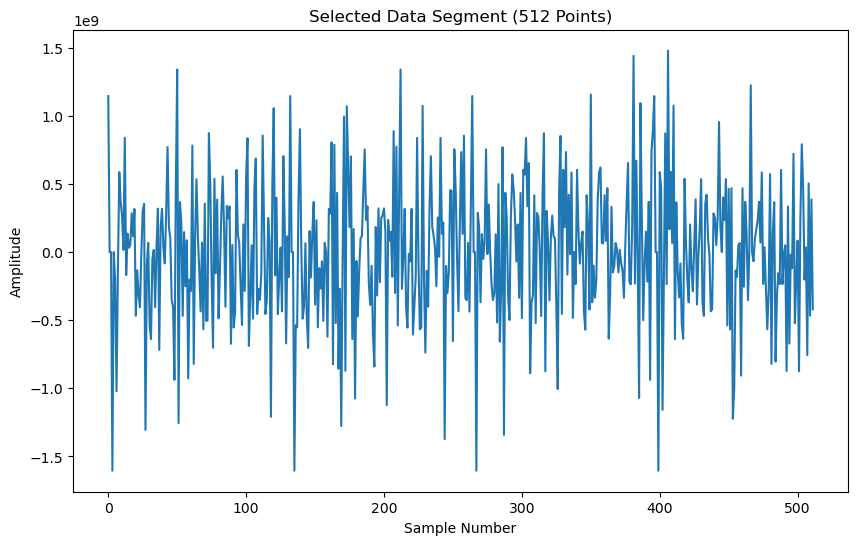

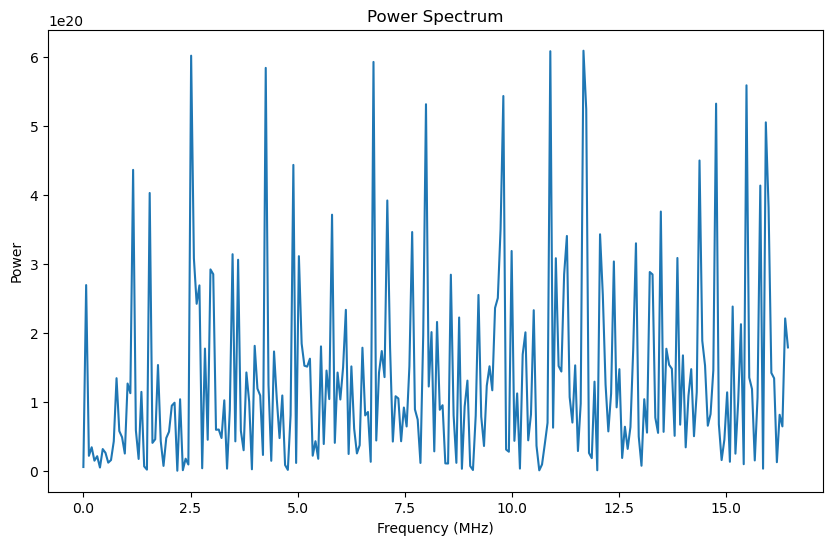

In [32]:
# Take 512 points from the chosen column
N_choosen = N_data[0:512]

# Plot the selected data segment
plt.figure(figsize=(10, 6))
plt.plot(N_choosen)
plt.title("Selected Data Segment (512 Points)")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.show()

# Perform Fourier Transform
N_fft = np.fft.fft(N_choosen)
N_freq = np.fft.fftfreq(len(N_choosen), d=1/33)  # d=1/33 for microsecond scale

# Take only positive frequencies
half_index = len(N_choosen) // 2
N_fft_half = N_fft[:half_index]
N_freq_half = N_freq[:half_index]

# Compute modulus-square for power spectrum
power_spectrum = np.abs(N_fft_half) ** 2

# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.plot(N_freq_half, power_spectrum)
plt.title("Power Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.show()


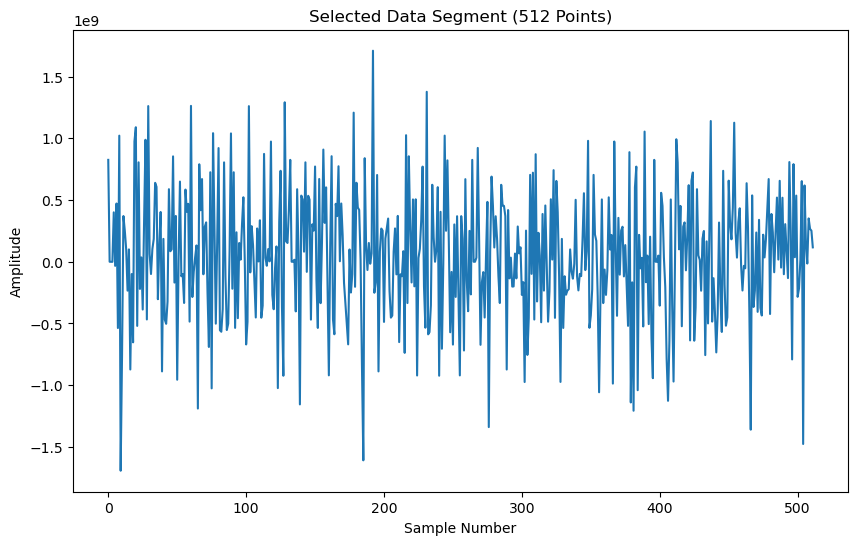

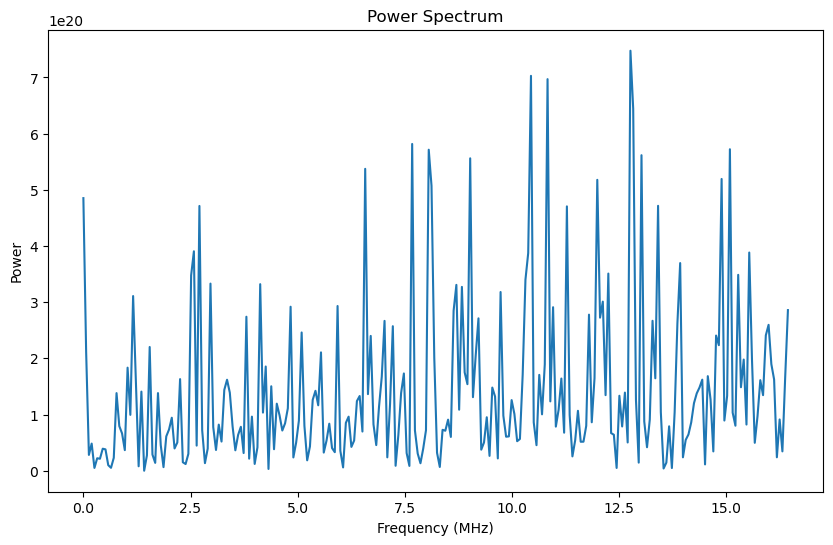

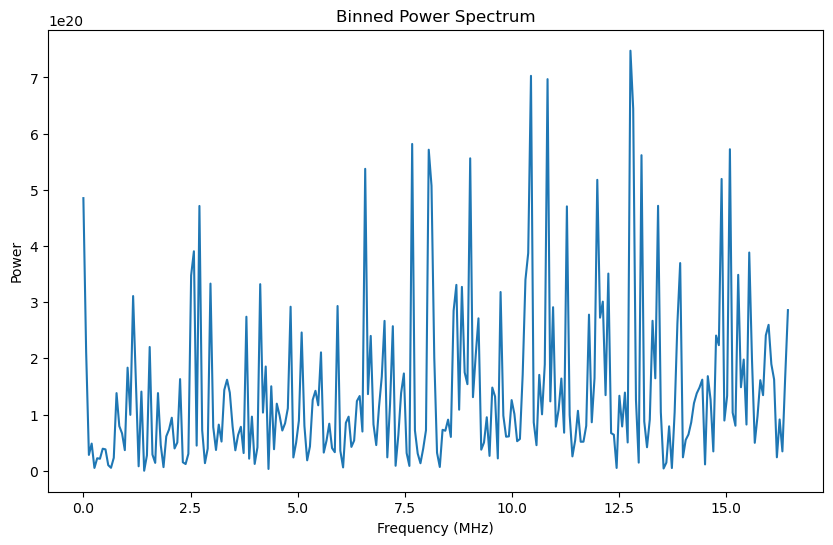

In [33]:
# Take 512 points from the chosen column
N_choosen = S_data[0:512]

# Plot the selected data segment
plt.figure(figsize=(10, 6))
plt.plot(N_choosen)
plt.title("Selected Data Segment (512 Points)")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.show()

# Perform Fourier Transform
N_fft = np.fft.fft(N_choosen)
N_freq = np.fft.fftfreq(len(N_choosen), d=1/33)  # d=1/33 for microsecond scale

# Take only positive frequencies
half_index = len(N_choosen) // 2
N_fft_half = N_fft[:half_index]
N_freq_half = N_freq[:half_index]

# Compute modulus-square for power spectrum
power_spectrum = np.abs(N_fft_half) ** 2

# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.plot(N_freq_half, power_spectrum)
plt.title("Power Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.show()

# Bin the fft plot set a moving avrage as to smoothen the plot
def bin_data(data, bin_size):
    binned_data = []
    for i in range(0, len(data), bin_size):
        binned_data.append(np.mean(data[i:i+bin_size]))
    return binned_data

# Bin the power spectrum
bin = 1
binned_power_spectrum = bin_data(power_spectrum, bin)
binned_freq = bin_data(N_freq_half, bin)

#plot
plt.figure(figsize=(10, 6))
plt.plot(binned_freq, binned_power_spectrum)
plt.title("Binned Power Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.show()



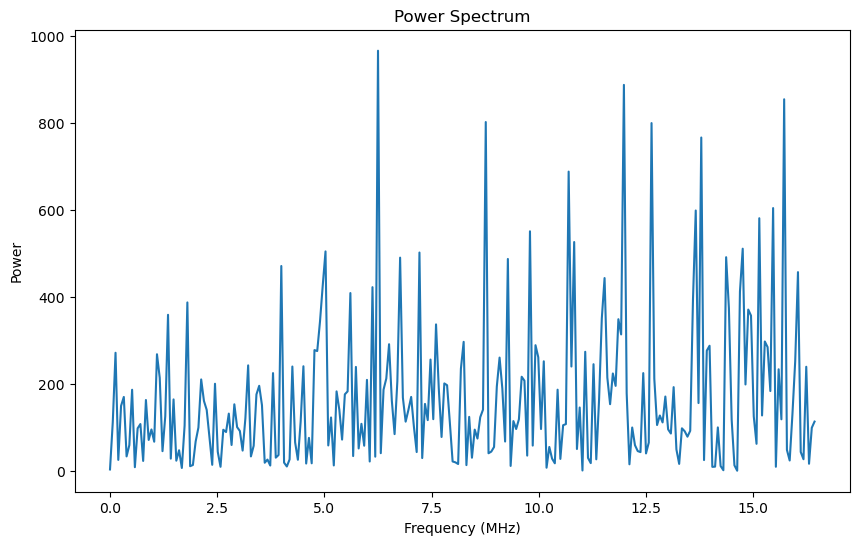

In [34]:
end = 512
step = 512
start = 0

#Scalling the Data
N_Scaled_Data = (N_data-np.mean(N_data))/np.std(N_data)
S_Scaled_Data = (S_data-np.mean(S_data))/np.std(S_data)


N_choosen = N_Scaled_Data[start:end]
start = start + len(N_choosen)
end = end + len(N_choosen)
N_fft = np.fft.fft(N_choosen)
N_freq = np.fft.fftfreq(len(N_choosen), d=1/33)  # d=1/33 for microsecond scale

N_fft_final = N_fft
N_fft_final_freq = N_freq

while end <= len(S_data):
    N_choosen = N_Scaled_Data[start:end]
    start = start + len(N_choosen)
    end = end + len(N_choosen)
    N_fft = np.fft.fft(N_choosen)
    N_fft_final = (N_fft_final[:]+N_fft[:])/2

# Take only positive frequencies
half_index = len(N_choosen) // 2
N_fft_half = N_fft_final[:half_index]
N_freq_half = N_fft_final_freq[:half_index]

# Compute modulus-square for power spectrum
power_spectrum = np.abs(N_fft_half) ** 2

# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.plot(N_freq_half, power_spectrum)
plt.title("Power Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.show()

# take a moving avrage of power spectra


In [35]:
512*256

131072

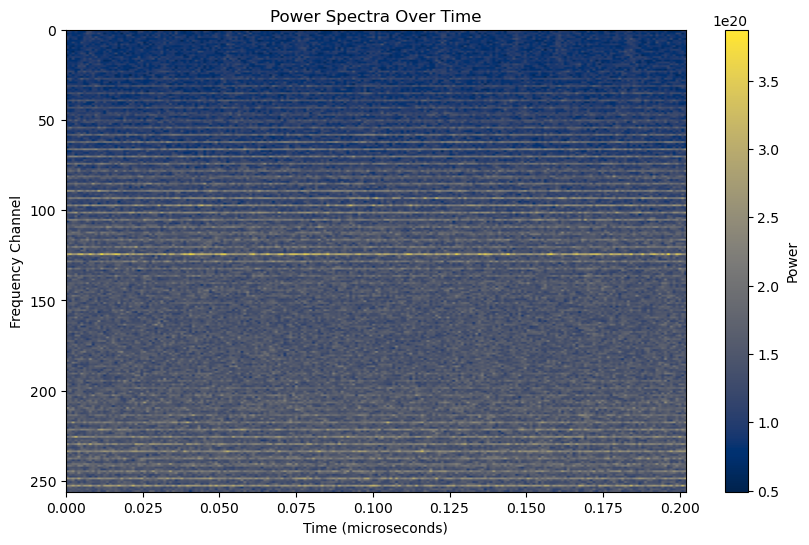

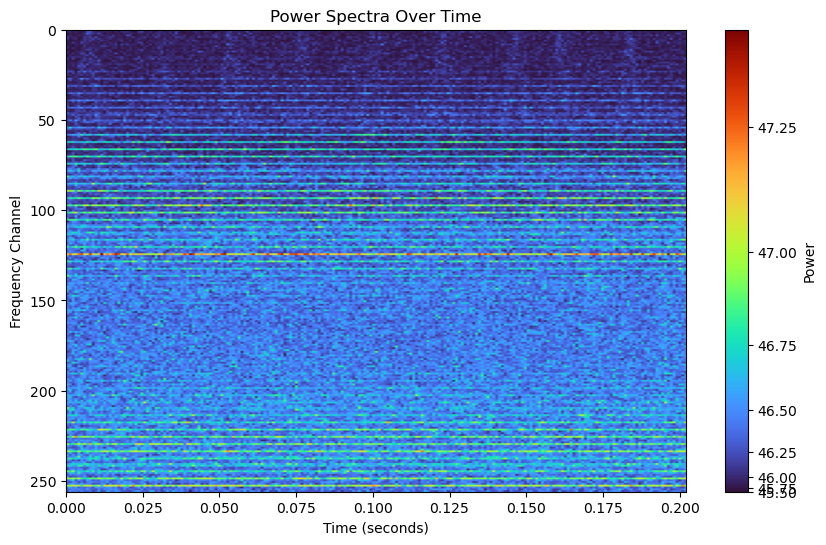

In [36]:
M = 60 
N_points = 512 

# Ensure that the total dataset is a multiple of (M * N_points)
num_segments = len(N_data) // (M * N_points)
N_data_trimmed = N_data[:num_segments * M * N_points] 

# Reshape data into (num_segments * M, N_points)
N_data_reshaped = N_data_trimmed.reshape(num_segments * M, N_points)

# Compute FFT and power spectra for each 512-point segment
power_spectra = np.abs(np.fft.fft(N_data_reshaped, axis=1))[:, :N_points // 2] ** 2  # Only +ve freq

# Average every M power spectra
power_spectra_avg = power_spectra.reshape(num_segments, M, N_points // 2).mean(axis=1)

# Stack into a 2D matrix (time vs frequency)
intensity_matrix = power_spectra_avg

# Plot the intensity matrix as an image
plt.figure(figsize=(10, 6))
plt.imshow(intensity_matrix.T, aspect='auto', origin='upper', cmap='cividis',
           extent=[0, num_segments * (M * N_points / 33)* 10**-6, N_points // 2,0])
plt.colorbar(label="Power")
plt.xlabel("Time (microseconds)")
plt.ylabel("Frequency Channel")
plt.title("Power Spectra Over Time")
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(np.log1p(intensity_matrix.T), aspect='auto', origin='upper', cmap='turbo', norm=colors.PowerNorm(gamma=3),
           extent=[0, num_segments * (M * N_points / 33) * 10**-6, N_points // 2,0])
plt.colorbar(label="Power")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency Channel")
plt.title("Power Spectra Over Time")
plt.show()

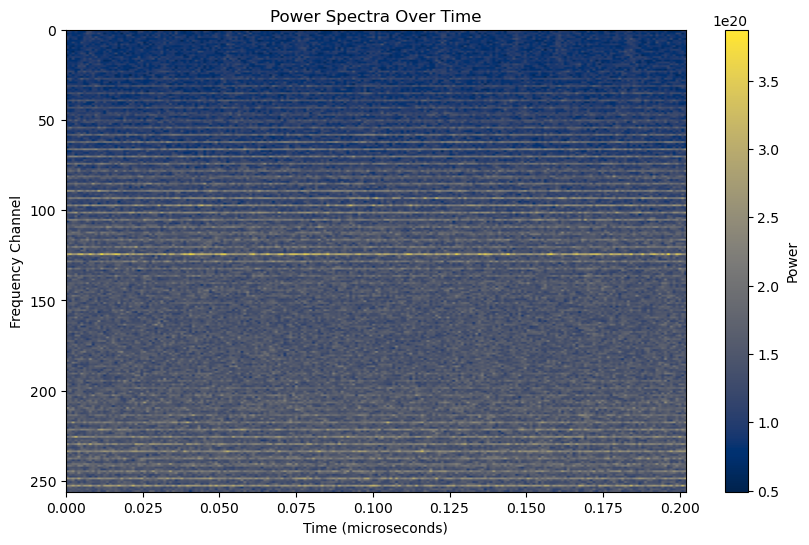

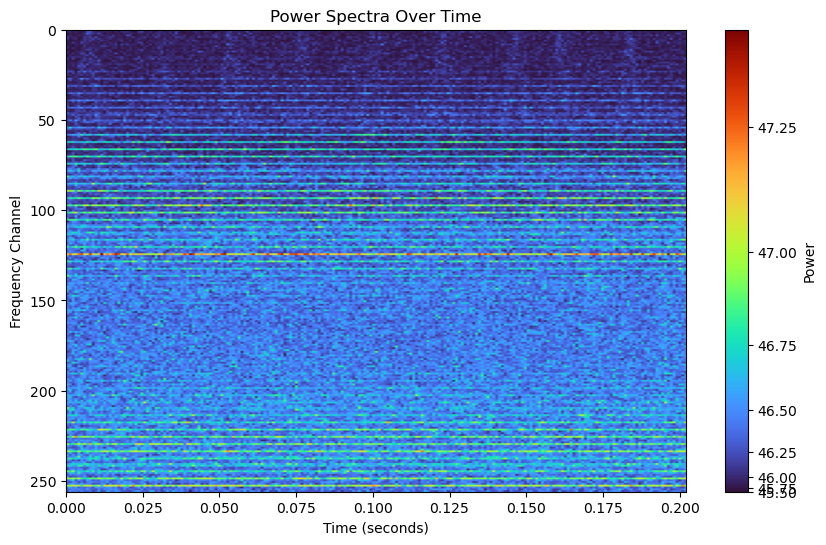

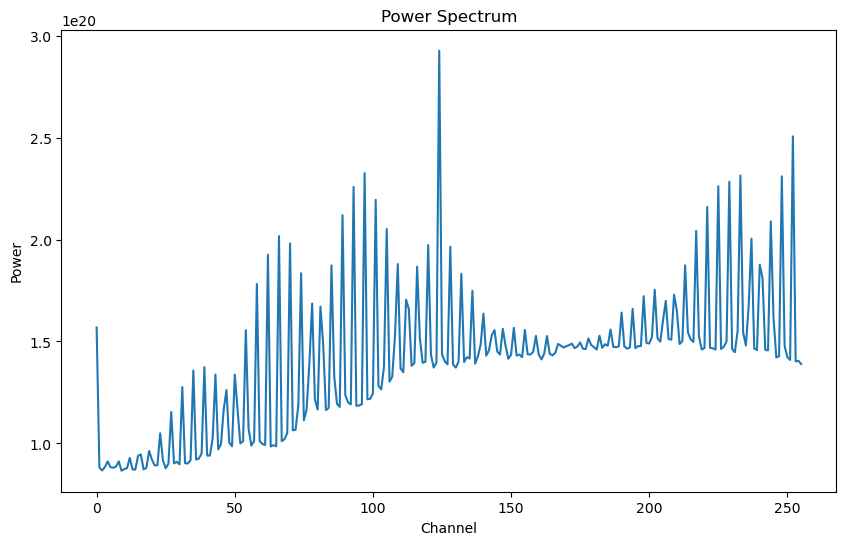

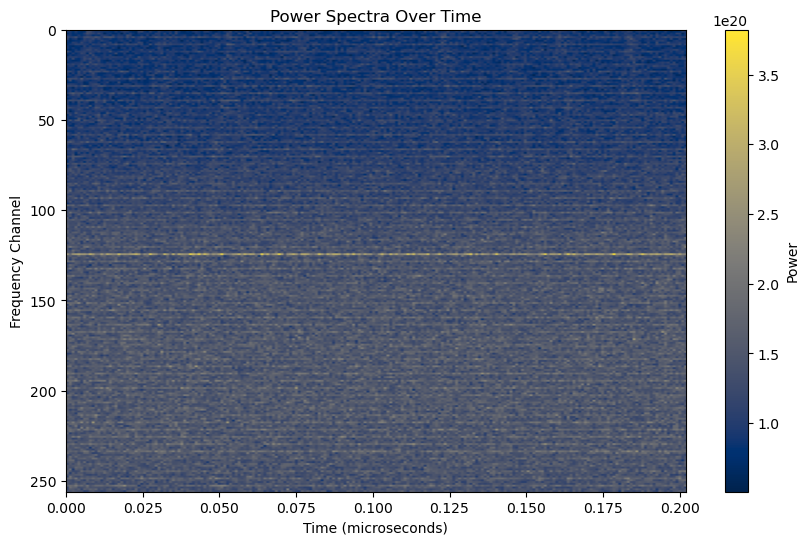

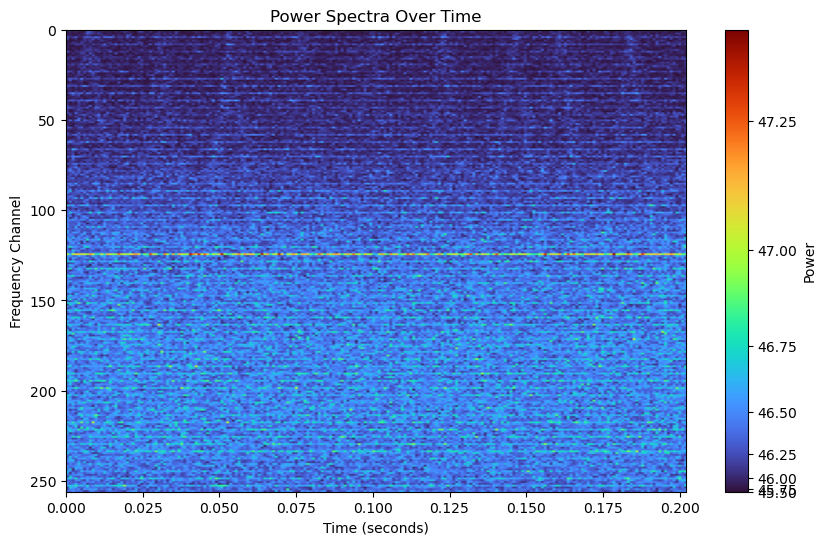

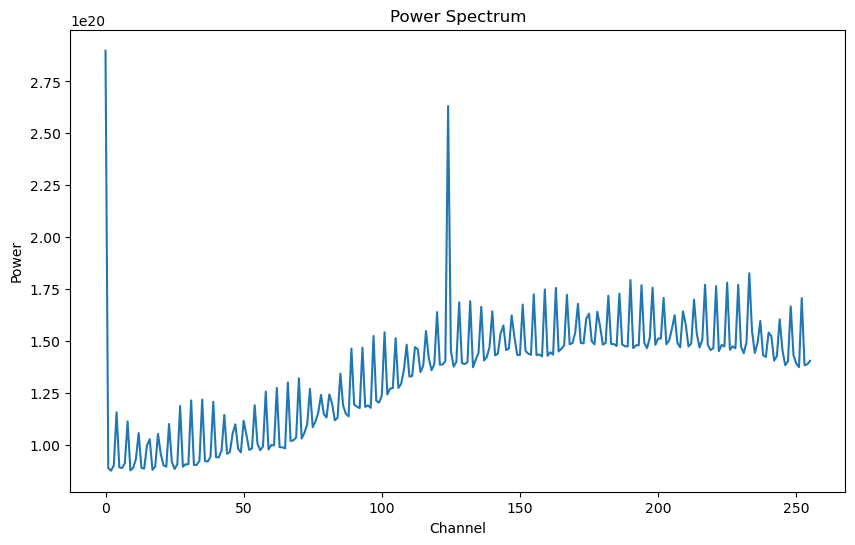

In [37]:
def Make_frequency_plot(N_data):
    M = 60 
    N_points = 512 

    # Ensure that the total dataset is a multiple of (M * N_points)
    num_segments = len(N_data) // (M * N_points)
    N_data_trimmed = N_data[:num_segments * M * N_points] 

    # Reshape data into (num_segments * M, N_points)
    N_data_reshaped = N_data_trimmed.reshape(num_segments * M, N_points)

    # Compute FFT and power spectra for each 512-point segment
    power_spectra = np.abs(np.fft.fft(N_data_reshaped, axis=1))[:, :N_points // 2] ** 2  # Only +ve freq

    # Average every M power spectra
    power_spectra_avg = power_spectra.reshape(num_segments, M, N_points // 2).mean(axis=1)
    power_spectra_avg_1d = power_spectra_avg.mean(axis=0)

    # Stack into a 2D matrix (time vs frequency)
    intensity_matrix = power_spectra_avg

    # Plot the intensity matrix as an image
    plt.figure(figsize=(10, 6))
    plt.imshow(intensity_matrix.T, aspect='auto', origin='upper', cmap='cividis',
            extent=[0, num_segments * (M * N_points / 33)* 10**-6, N_points // 2,0])
    plt.colorbar(label="Power")
    plt.xlabel("Time (microseconds)")
    plt.ylabel("Frequency Channel")
    plt.title("Power Spectra Over Time")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.imshow(np.log1p(intensity_matrix.T), aspect='auto', origin='upper', cmap='turbo', norm=colors.PowerNorm(gamma=3),
            extent=[0, num_segments * (M * N_points / 33) * 10**-6, N_points // 2,0])
    plt.colorbar(label="Power")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency Channel")
    plt.title("Power Spectra Over Time")
    plt.show()

        # Take only positive frequencies
    #freq = np.fft.fftfreq(len(N_data), d=1/33)  # d=1/33 for microsecond scale
    #half_index = len(N_choosen) // 2
    #N_fft_half = N_fft_final[:half_index]
    #N_freq_half = [:half_index]

    # Plot power spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(power_spectra_avg_1d)), power_spectra_avg_1d) 
    plt.title("Power Spectrum")
    plt.xlabel("Channel")
    plt.ylabel("Power")
    plt.show()

#N_Scaled_Data = (N_data-np.mean(N_data))/np.std(N_data)

Make_frequency_plot(N_data)
Make_frequency_plot(S_data)

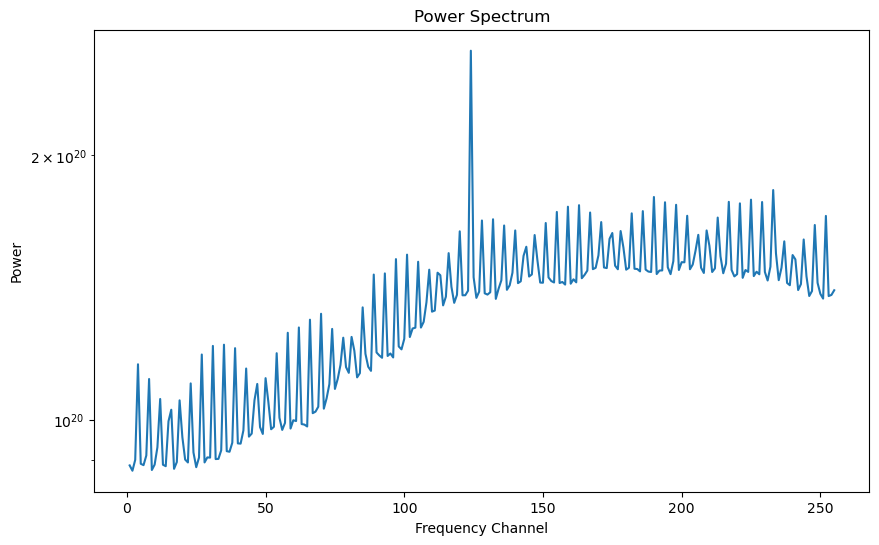

In [38]:
M = 60  # Corresponds to 1 ms resolution
N_points = 512  # Number of points per FFT

# Ensure that the total dataset is a multiple of (M * N_points)
num_segments = len(S_data) // (M * N_points)
S_data_trimmed = S_data[:num_segments * M * N_points]  # Trim extra data

# Reshape data into (num_segments * M, N_points)
S_data_reshaped = S_data_trimmed.reshape(num_segments * M, N_points)

# Compute FFT and power spectra for each 512-point segment
power_spectra = np.abs(np.fft.fft(S_data_reshaped, axis=1))[:, :N_points // 2] ** 2  # Only +ve freq

# Average every M power spectra
power_spectra_avg = power_spectra.reshape(num_segments, M, N_points // 2).mean(axis=1).mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(range(len(power_spectra_avg))[1:],power_spectra_avg[1:])
plt.yscale('log')
plt.title("Power Spectrum")
plt.xlabel("Frequency Channel")
plt.ylabel("Power")
plt.show()

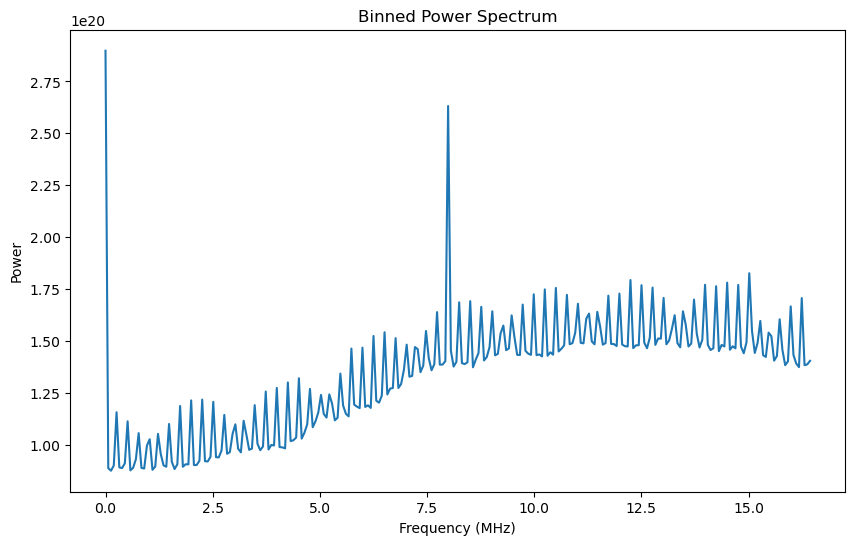

In [39]:
# Bin the power spectrum
bin = 1
binned_power_spectrum = bin_data(power_spectrum, bin)
binned_freq = bin_data(N_freq_half, bin)

#plot
plt.figure(figsize=(10, 6))
plt.plot(binned_freq, power_spectra_avg)
plt.title("Binned Power Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.show()

In [40]:
# Compute FFT and power spectra for each 512-point segment
power_spectra = np.abs(np.fft.fft(N_data_reshaped, axis=1))[:, :N_points // 2] ** 2  # Only +ve freq

# Average every M power spectra
power_spectra_avg = power_spectra.reshape(num_segments, M, N_points // 2).mean(axis=1)

"cividis" → Good for colorblind accessibility, smooth transitions.
"plasma" → Bright, perceptually uniform.
"magma" → Dark background, high contrast.
"turbo" → More vibrant colors.